<a href="https://colab.research.google.com/github/carlamaziero/Reconhecimento_padroes/blob/main/Aula3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from platform import python_version

In [2]:
import pandas as pd
import urllib.request
from scipy.io.arff import loadarff
from io import StringIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00264/EEG%20Eye%20State.arff'
resp = urllib.request.urlopen(url)
data, meta = loadarff(StringIO(resp.read().decode('utf-8')))

df = pd.DataFrame(data)

for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].str.decode('UTF-8')

X, y = df.iloc[:, :5], df.iloc[:, -1]

In [3]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(X, y)
ypred =  modelo.predict(X)
intercept_ypred = modelo.intercept_
coef_ypred = modelo.coef_
print("Valor do Intercept: ", intercept_ypred)
print("Valor dos coeficientes da Regressão Linear: ", coef_ypred)

Valor do Intercept:  [-8.31705257e-07]
Valor dos coeficientes da Regressão Linear:  [[ 0.01104811 -0.01792678  0.01343843 -0.01061587  0.00244009]]


In [4]:
from sklearn.metrics import mean_squared_error

mse_ypred = mean_squared_error(y, ypred)
print("Valor MSE: ", mse_ypred)

Valor MSE:  0.4128838451268358


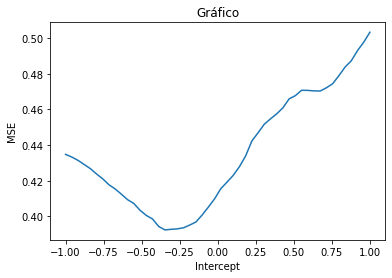

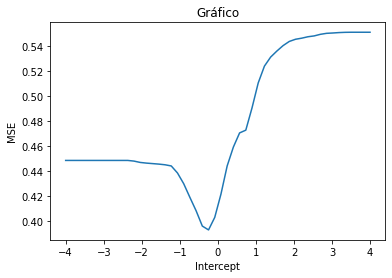

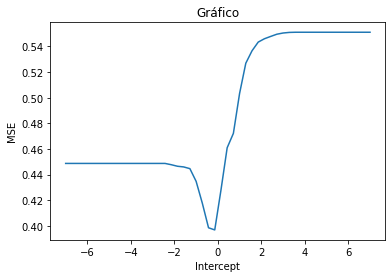

In [5]:
import numpy as np
import matplotlib.pyplot as plt

delta = 1
iteracoes = 50

for i in range(3 * modelo.intercept_.shape[0]):

    intercept_range = np.linspace(intercept_ypred - delta, intercept_ypred + delta, iteracoes)
    delta = delta + 3
    
    mse = []

    for i in range(iteracoes):
        modelo.intercept_ = intercept_range[i]
        ypred =  modelo.predict(X)
        mse.append(mean_squared_error(y, ypred))

    plt.title("Gráfico")
    plt.ylabel("MSE")
    plt.xlabel("Intercept")
    plt.plot(intercept_range, mse)
    plt.show()